In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from ISLP import load_data

In [3]:
from scipy.stats import (ttest_1samp, ttest_rel, ttest_ind, t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test

# Creation sample data

In [4]:
rng = np.random.default_rng(12)
X = rng.standard_normal((10, 100))
true_mean = np.array([0.5] * 50 + [0] * 50)
X += true_mean[None, :]

In [10]:
X[:10]

array([[ 4.93173220e-01,  1.54614329e+00,  1.24158842e+00,
         1.22395654e+00,  2.11877622e+00, -7.05558143e-01,
        -1.26955471e-01, -8.20663212e-01,  3.92247492e-01,
         1.49876366e+00,  4.78052114e-01,  9.95880066e-01,
        -1.41076866e+00,  6.47064166e-01, -4.06943251e-01,
         2.27538939e+00,  1.38684908e+00,  1.44934948e+00,
         4.42145037e-01,  1.11286227e+00,  1.15789016e+00,
         1.55597334e-01,  2.62796450e-03,  3.85227217e-01,
        -1.05452009e-01, -9.43394175e-02,  2.16624624e-01,
        -2.28417727e-01,  1.26632779e+00, -1.09608633e+00,
         1.32356213e+00, -1.25566470e-01, -4.59399557e-02,
        -8.50847142e-01,  3.55757881e-01,  2.52338491e-01,
         6.91455831e-01, -3.37742959e-02,  5.93756179e-01,
         2.31969184e+00,  9.08999694e-01, -7.36900372e-02,
         1.45310960e+00,  3.71198866e-01,  1.09387447e+00,
         1.11274743e+00,  1.08934283e-01, -1.43028750e+00,
         1.52346377e-01,  1.05145542e+00, -3.80110407e-0

In [11]:
X.shape

(10, 100)

* 100 Variables: each consisting of 10 observations
* the first 50 variables -> mean = 0.5 and variance = 1
* latter 50 variables -> mean = 0 and variance = 1 

# Basic hypothesis testing

$H_{0}$: $\mu_{1}$ = 0 

Null Hypothesis: The first variable has a mean of zero

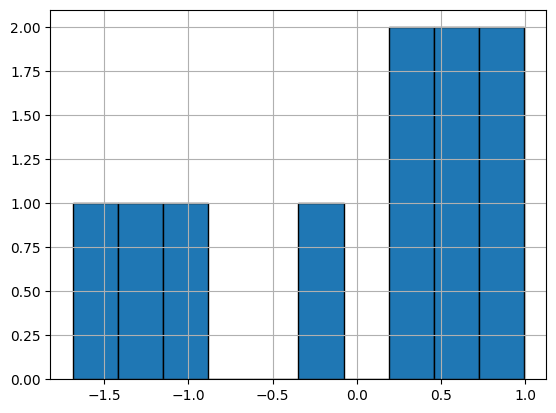

In [17]:
plt.hist(X[:, 0], edgecolor = "black")
plt.grid()

In [ ]:
ttest_1samp()

In [20]:
result = ttest_1samp(a = X[:, 0], popmean = 0)
result.pvalue

0.9307442156164141

The p-value comes out to 0.931, which is not low enough to reject the null hypothesis at level $\alpha$=0.05. <br>
So, a Type II Error has been committed by failing to reject the null hypothesis even if the null hypothesis is false.

# Multi-Testing

## First example

Test of $H_{0,j}$: $\mu_{j}$ = 0 for $j$ = 1,...,100 <br>
100 p-values are computed and then a vector is build containing where the jth p-value is less than or equal to 0.05

In [21]:
p_values = np.empty(100)

for i in range(100):
    p_values[i] = ttest_1samp(a = X[:, i], popmean = 0).pvalue

decision = pd.cut(
    x = p_values,
    bins = [0, 0.05, 1],
    labels = ["Reject H0", "Do not reject H0"]
)

truth = pd.Categorical(values = (true_mean == 0), 
                       categories = [True, False],
                       ordered=True)

In [22]:
p_values

array([0.93074422, 0.15003088, 0.00239732, 0.08583596, 0.00188798,
       0.01319842, 0.2412137 , 0.06960788, 0.08142718, 0.1733895 ,
       0.01036924, 0.00233592, 0.78249868, 0.16491192, 0.4650882 ,
       0.06150682, 0.01981225, 0.01606304, 0.01164038, 0.14570143,
       0.00106391, 0.00402719, 0.12489097, 0.04679772, 0.2076589 ,
       0.0969096 , 0.41073091, 0.30497068, 0.18878679, 0.01453565,
       0.05363416, 0.00148435, 0.24736401, 0.93753362, 0.04064538,
       0.06111688, 0.02279336, 0.55318848, 0.24707885, 0.11399264,
       0.17014519, 0.81478496, 0.58709653, 0.09439323, 0.1359685 ,
       0.11838197, 0.45421099, 0.2438079 , 0.52978157, 0.64817496,
       0.96921405, 0.64547339, 0.80804557, 0.56712411, 0.00472933,
       0.21329108, 0.81942336, 0.0465359 , 0.1596258 , 0.12758739,
       0.19251318, 0.22666569, 0.31395446, 0.90967572, 0.6015339 ,
       0.39481423, 0.16703267, 0.58260728, 0.93407113, 0.4708747 ,
       0.82082893, 0.79448933, 0.68566211, 0.86569841, 0.98158

In [23]:
decision

['Do not reject H0', 'Do not reject H0', 'Reject H0', 'Do not reject H0', 'Reject H0', ..., 'Do not reject H0', 'Do not reject H0', 'Do not reject H0', 'Do not reject H0', 'Reject H0']
Length: 100
Categories (2, object): ['Reject H0' < 'Do not reject H0']

In [26]:
pd.crosstab(
    decision,
    truth,
    rownames=["Decision"],
    colnames=["H0"]
)

H0,True,False
Decision,,
Reject H0,5,15
Do not reject H0,45,35


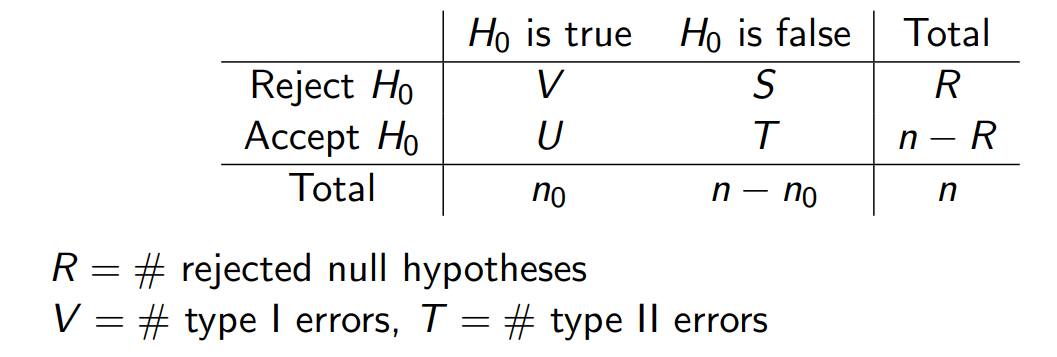

Where False Discovery rate = V / R (here: 5 / 20)

We reject 15 of 50 false null hypotheses, and incorrectly reject 5 of the true null hypotheses. 

## Second Example

the ratio of the mean to the std dev was only 0.5 / 1 = 0.5 in the above simulation. <br>
This amount is quite weak and it resulted in a high number of Type II errors. <br>
Now, a stronger signal is simulated:

In [28]:
true_mean = np.array([1] * 50 + [0] * 50)
X = rng.standard_normal((10, 100))
X += true_mean[None, :]

for i in range(100):
    p_values[i] = ttest_1samp(X[:, i], 0).pvalue

decision = pd.cut(
    x = p_values,
    bins = [0, 0.05, 1],
    labels = ["Reject H0", "Do not reject H0"]
)

truth = pd.Categorical(values = (true_mean == 0),
                       categories = [True, False],
                       ordered=True)

pd.crosstab(
    decision,
    truth,
    rownames=["Decision"],
    colnames=["H0"]
)

H0,True,False
Decision,,
Reject H0,2,40
Do not reject H0,48,10


we stil do 2 / 50 False Positives

# Family-Wise Error Rate

if from above for m independent hypothesis test the null hypothesis holds, then the FWER (Family-wise error rate) is 1-(1-$\alpha$)$^{m}$ <br>
with this expression, it's possible to compute FWER for $m=1, ... , 500$ and $\alpha$=0.05, 0.01, 0.001

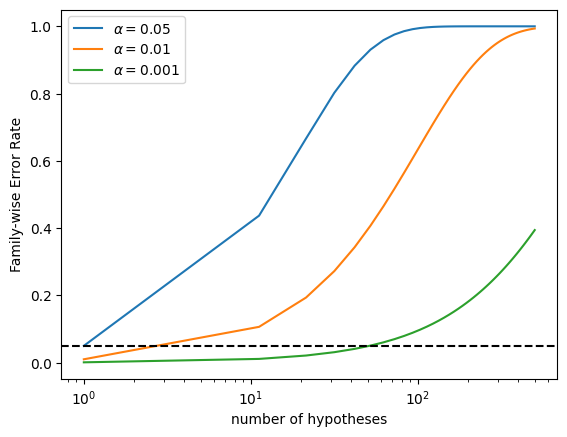

In [31]:
m = np.linspace(1, 501)
fig, ax = plt.subplots(1,1)

[ax.plot(m,
        1-(1-alpha)**m,
        label = r"$\alpha=%s$" % str(alpha))
        for alpha in [0.05, 0.01, 0.001]]

ax.set_xscale("log")
ax.set_xlabel("number of hypotheses")
ax.set_ylabel("Family-wise Error Rate")
ax.legend()
ax.axhline(0.05, c="k", ls = "--");

These curves describe the probability to result with the test setup in false positives <br>

As discussed previously, even for moderate values of $m$ such as 50, the FWER exceeds 0.05 unless $\alpha$ is set to a very low value (such as 0.001). Of course, the problem with setting $\alpha$ to such a low value is that we ware likely to make a number of type II errors: in other words, our power is very low.

# T-test on the Fund Dataset

$H_{0,j}$: $\mu_{j}$=0 <br>

The jth fund manager's mean return equals zero

In [32]:
Fund = load_data("Fund")
fund_mini = Fund.iloc[:, :5]
fund_mini_pvals = np.empty(5)

for i in range(5):
    fund_mini_pvals[i] = ttest_1samp(fund_mini.iloc[:, i], 0).pvalue

fund_mini_pvals

array([0.00620236, 0.91827115, 0.01160098, 0.6005396 , 0.75578151])

p-vals for managers 1 & 3 are sufficiently low, but however we can't simply reject $H_{0,1}$ and $H_{0,3}$ since this would fail to account for the multiple testing that we have performed. <br>
Instead, we will conduct Bonferroni's method and Holm's method to control FWER.

To do this, we use multipletests() function from statsmodels. given the pvals for method like Holm and Bonferroni, the function outputs adjusted pvals which can be thought of as a now set of pvals that have been corrected for multiple testing.<br>

if the adjusted pval for a given hypothesis is less than or equal to $\alpha$, then that hypothesis can be rejected while maintaining a FWER of no more than $\alpha$. <br>
In other words, for such methods, the adjusted pvals resulting from the multipletests() method can simply be compared to the desired FWER in order to determine whether or not to rejct each hypothesis. 

The mult_test() function takes pvals and a method argument, as well as an optional alpha argument. it returns the decisions (reject below) as well as the adjusted pvals (bonf)

In [34]:
reject, bonf = mult_test(fund_mini_pvals, method = "bonferroni")[:2]

reject

array([ True, False, False, False, False])

the adjusted pvals with the bonferroni approach are simply the fund_mini_pvals multiplied by 5 and truncated to be less than or equal to 1.

In [36]:
bonf, np.minimum(fund_mini_pvals * 5, 1)

(array([0.03101178, 1.        , 0.05800491, 1.        , 1.        ]),
 array([0.03101178, 1.        , 0.05800491, 1.        , 1.        ]))

Therefore using the bonferroni's method, we are able to reject the null hypothesis only for manager 1 while controlling FWER at 0.05. <br>

By contract, using Holm's method, the adjusted pvals indicatee that we can reject the null hypothesis for managers 1 and 3 at a FWER of 0.05

In [37]:
mult_test(fund_mini_pvals, method = "holm", alpha = .05)[:2]

(array([ True, False,  True, False, False]),
 array([0.03101178, 1.        , 0.04640393, 1.        , 1.        ]))

# Find differences between statistical units

is there evidence of a meaningful difference in performance between the two managers? 
<br> --> Perform a paired t-test using ttest_rel(): 

In [38]:
fund_mini.mean()

Manager1    3.0
Manager2   -0.1
Manager3    2.8
Manager4    0.5
Manager5    0.3
dtype: float64

In [40]:
ttest_rel(fund_mini["Manager1"], fund_mini["Manager2"]).pvalue

0.038391072368079586

The pval of 0.038 suggests a statistically significant difference. <br>
However, we perform the test only after examining the data and noting that managers 1 and 2 had the highest and lowest mean performances.<br>
In a sense, this means that we have implicitly performed $\binom{5}{2} = 5*(5-1)/2 = 10$ Hypothesis tests, rather than just one. <br>

Hence, we use the pairwise_tuckeyhsd() function from statsmodels.stat.multicomp to apply fitted anova regression model, which is essentially just a linear regression in which all of the predictors are qualitative.<br>
In this case, the response consists of the monthly excess returns achieved by each manager, and the predictor indicates the manager to which each return correponds.

In [42]:
returns = np.hstack([fund_mini.iloc[:, i] for i in range(5)])
managers = np.hstack([[i+1]*50 for i in range(5)])

tukey = pairwise_tukeyhsd(returns, managers)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     -3.1 0.1862 -6.9865 0.7865  False
     1      3     -0.2 0.9999 -4.0865 3.6865  False
     1      4     -2.5 0.3948 -6.3865 1.3865  False
     1      5     -2.7 0.3152 -6.5865 1.1865  False
     2      3      2.9 0.2453 -0.9865 6.7865  False
     2      4      0.6 0.9932 -3.2865 4.4865  False
     2      5      0.4 0.9986 -3.4865 4.2865  False
     3      4     -2.3  0.482 -6.1865 1.5865  False
     3      5     -2.5 0.3948 -6.3865 1.3865  False
     4      5     -0.2 0.9999 -4.0865 3.6865  False
---------------------------------------------------


In [44]:
returns.shape, managers.shape

((250,), (250,))

the pairwise_tukeyhsd() function provides confidence intervals for the difference between each pair of managers (lower and Upper) as well as a pval. all of these quantities have been adjusted for multiple testing. notice that the pval for the difference between managers 1 and 2 has increased from 0.038 to 0.186, so there is no longer clear evidence of a difference between the managers performances. <br>
we can plot the confidence intervals fro the pairwise comparisons using the plot_simultaneous() method of tukey. Any pair of intervals that don't overlap indicates a significant difference at the nominal level of 0.05. in this case, no differences are considered significant as reported in the table above.

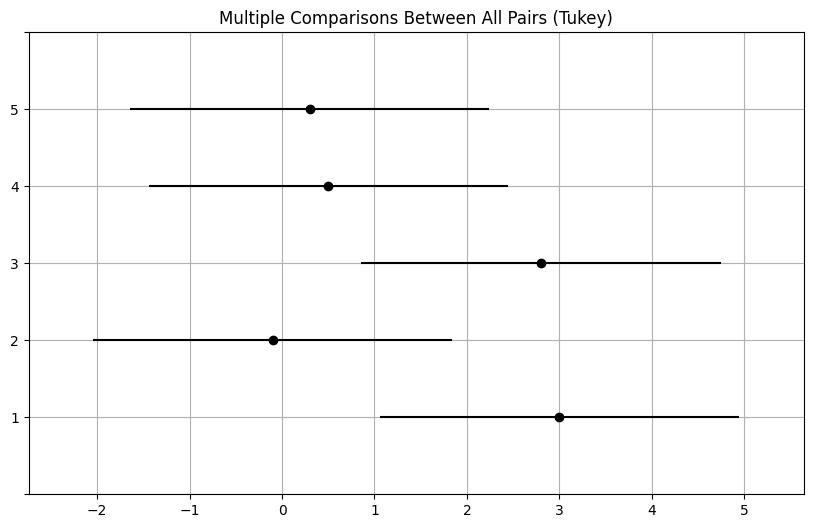

In [48]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

tukey.plot_simultaneous(ax = ax)
ax.grid();